In [ ]:
import csv
import math
import heapq
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import re

In [ ]:
class Node:
    def __init__(self, latitude, longitude, height):
        self.latitude = latitude
        self.longitude = longitude
        self.height = height
        self.g = float('inf')
        self.f = None
        self.parent = None

    def __lt__(self, other):
        return self.f < other.f

In [ ]:
def euclidean_distance(node1, node2):
    lat_diff = node1.latitude - node2.latitude
    lon_diff = node1.longitude - node2.longitude
    return math.sqrt(lat_diff * lat_diff + lon_diff * lon_diff)

In [ ]:
def reconstruct_path(node):
    path = []
    while node is not None:
        path.append((node.latitude, node.longitude))
        node = node.parent
    return path[::-1]

In [ ]:
def read_building_data(filename):
    graph = defaultdict(list)
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            nodeid,latitude, longitude, height = map(float, row)
            node = Node(latitude, longitude, height)
            graph[(latitude, longitude)].append(node)
    return graph

In [ ]:
if __name__ == "__main__":
    filename = "/content/dsa_project_dataset.csv"  # Replace with your filename

    graph = read_building_data(filename)

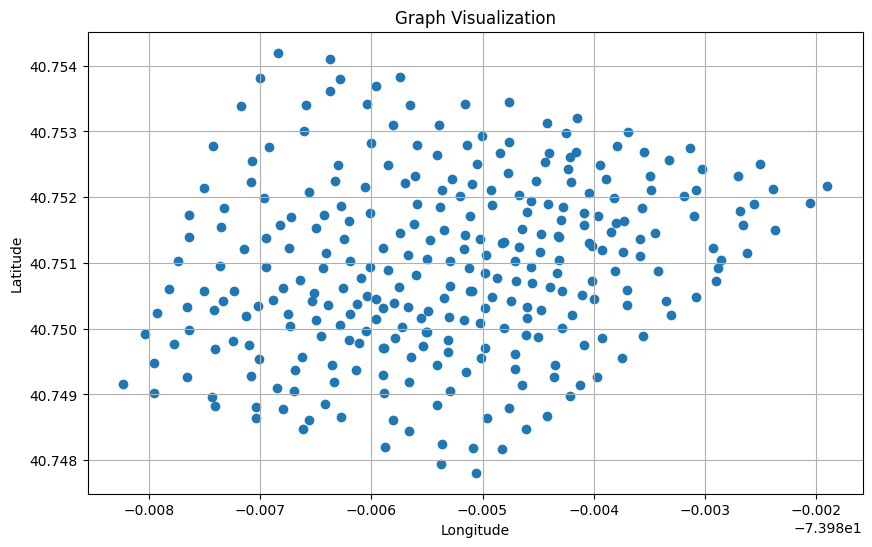

In [ ]:
# Extract coordinates from the dictionary
coordinates = list(graph.keys())
x = [coord[1] for coord in coordinates]  # Longitude
y = [coord[0] for coord in coordinates]  # Latitude

# Plotting the coordinates
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Graph Visualization')
plt.grid(True)
plt.show()


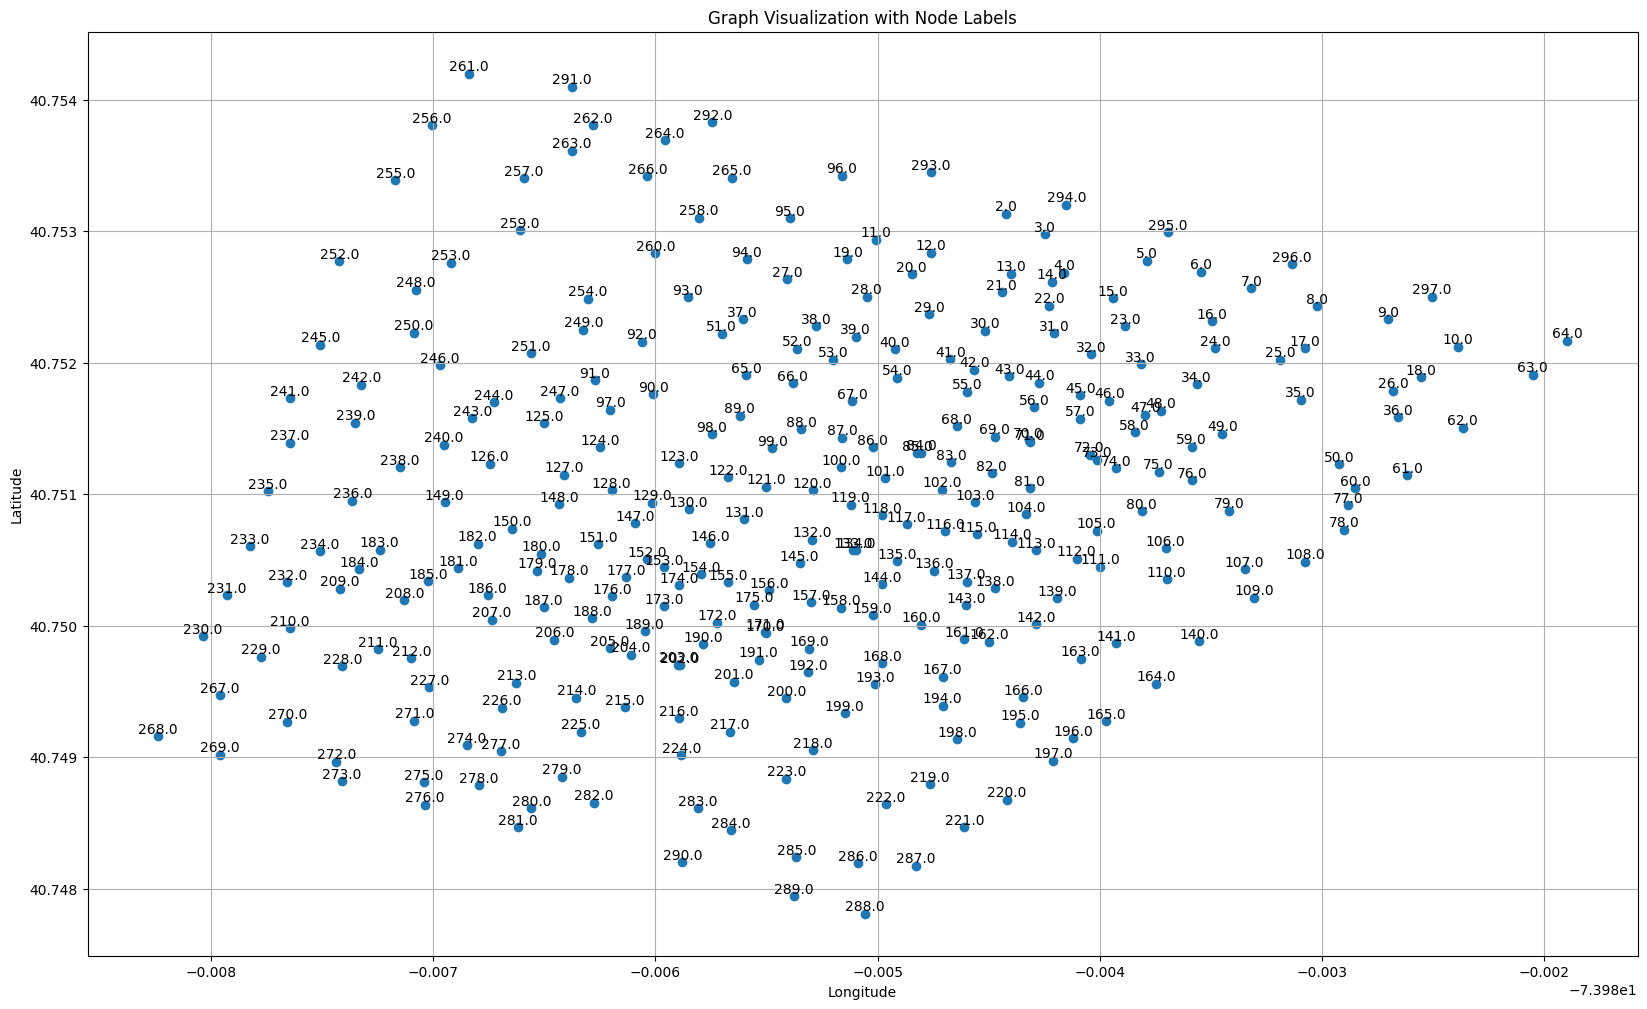

In [ ]:
# Define the Node class
class Node:
    def __init__(self, latitude, longitude, height):
        self.latitude = latitude
        self.longitude = longitude
        self.height = height

# Function to read building data from a CSV file
def read_building_data(filename):
    graph = defaultdict(list)
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            nodeid, latitude, longitude, height = map(float, row)
            node = Node(latitude, longitude, height)
            graph[(latitude, longitude)].append((nodeid, node))  # Store node ID along with node object
    return graph

if __name__ == "__main__":
    filename = "/content/dsa_project_dataset.csv"  # Replace with your filename
    # check_file_permissions(filename)

    graph = read_building_data(filename)

# Extract coordinates and node IDs from the dictionary
coordinates = list(graph.keys())
x = [coord[1] for coord in coordinates]  # Longitude
y = [coord[0] for coord in coordinates]  # Latitude
node_ids = [graph[coord][0][0] for coord in coordinates]  # Node IDs

# Plotting the coordinates
plt.figure(figsize=(20, 12))
plt.scatter(x, y)

# Annotate each node with its node ID
for i, node_id in enumerate(node_ids):
    plt.text(x[i], y[i], str(node_id), fontsize=10, ha='center', va='bottom')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Graph Visualization with Node Labels')
plt.grid(True)
plt.show()


In [ ]:
# Plotting the coordinates
fig = go.Figure(data=go.Scattergeo(lon=x, lat=y, mode='markers'))

# Customizing layout
fig.update_layout(
    title='Graph Visualization',
    geo=dict(
        projection_type='orthographic',
        showland=True,
        landcolor="rgb(250, 250, 250)",
        subunitcolor="rgb(217, 217, 217)",
        countrycolor="rgb(217, 217, 217)",
        countrywidth=0.5
    )
)

# Displaying the plot
fig.show()


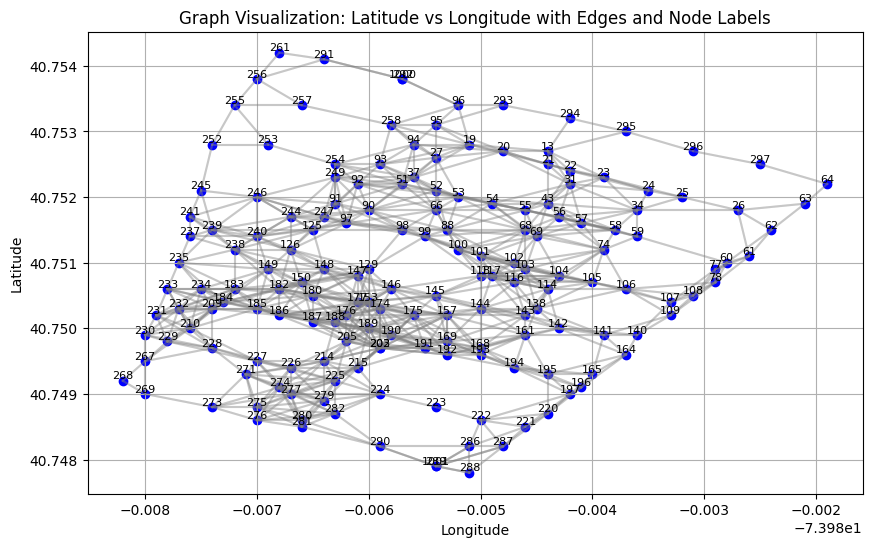

In [ ]:
# Function to parse latitude, longitude, and edge data from a dot file
def parse_dot_file(file_path):
    latitudes = {}
    longitudes = {}
    node_labels = {}  # New dictionary to store node labels
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            match_node = re.match(r'\s*(\d+)\s+\[label="([^"]+)\\n([^"]+),\s+([^"]+)\\n[^"]+"\];', line)  # Modified regex
            match_edge = re.match(r'\s*(\d+)\s+->\s+(\d+)\s+\[label="([^"]+)"\];', line)
            if match_node:
                node_id, label, latitude, longitude = match_node.groups()  # Extract label
                latitudes[node_id] = float(latitude)
                longitudes[node_id] = float(longitude)
                node_labels[node_id] = label  # Store label in dictionary
            elif match_edge:
                source, target, weight = match_edge.groups()
                edges.append((source, target, float(weight)))
    return latitudes, longitudes, node_labels, edges  # Return node_labels dictionary

# Path to the dot file
dot_file_path = '/content/graph.dot'

# Parse the dot file to extract latitude, longitude, and edge data
latitudes, longitudes, node_labels, edges = parse_dot_file(dot_file_path)

# Plot latitude and longitude data
plt.figure(figsize=(10, 6))
plt.scatter(longitudes.values(), latitudes.values(), color='blue', alpha=1)

# Plot node labels
for node_id, label in node_labels.items():
    plt.text(longitudes[node_id], latitudes[node_id], label, fontsize=8, ha='center', va='bottom')

# Plot edges
for edge in edges:
    source, target, _ = edge
    plt.plot([longitudes[source], longitudes[target]], [latitudes[source], latitudes[target]], color='gray', alpha=0.25)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Graph Visualization: Latitude vs Longitude with Edges and Node Labels')
plt.grid(True)
plt.show()


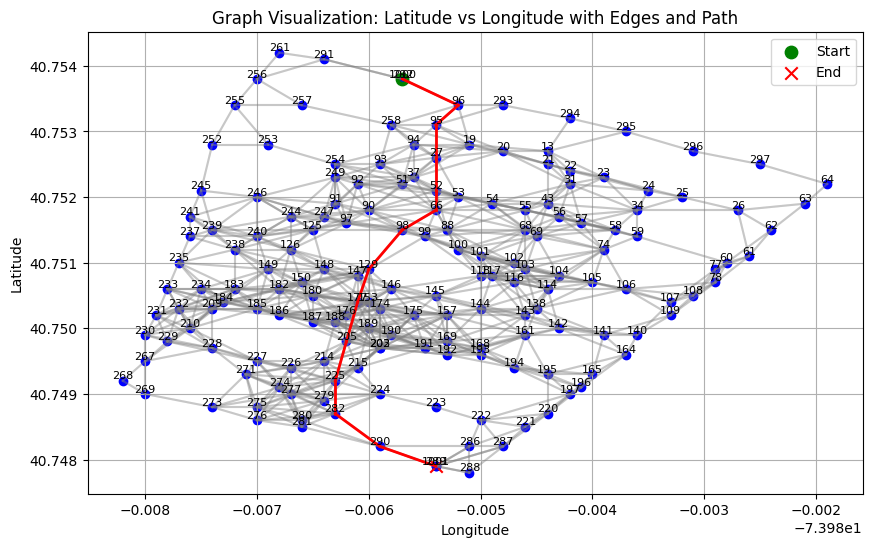

In [ ]:
# Function to parse latitude, longitude, and edge data from a dot file
def parse_dot_file(file_path):
    latitudes = {}
    longitudes = {}
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            match_node = re.match(r'\s*(\d+)\s+\[label="[^"]+\\n([^,]+),\s+([^"]+)\\n[^"]+"\];', line)
            match_edge = re.match(r'\s*(\d+)\s+->\s+(\d+)\s+\[label="([^"]+)"\];', line)
            if match_node:
                node_id, latitude, longitude = match_node.groups()
                latitudes[node_id] = float(latitude)
                longitudes[node_id] = float(longitude)
            elif match_edge:
                source, target, _ = match_edge.groups()
                edges.append((source, target))
    return latitudes, longitudes, edges

# Function to plot the graph
def plot_graph(latitudes, longitudes, edges, path=None):
    plt.figure(figsize=(10, 6))

    # Plot latitude and longitude data
    plt.scatter(longitudes.values(), latitudes.values(), color='blue', alpha=1)

    # Plot edges
    for edge in edges:
        source, target = edge
        plt.plot([longitudes[source], longitudes[target]], [latitudes[source], latitudes[target]], color='gray', alpha=0.25)

    # Plot path if provided
    if path:
        path_nodes = path.split()
        for i in range(len(path_nodes) - 1):
            source, target = path_nodes[i], path_nodes[i + 1]
            if source in latitudes and target in latitudes:
                plt.plot([longitudes[source], longitudes[target]], [latitudes[source], latitudes[target]], color='red', linewidth=2)

    # Plot start and end nodes
    for node_id, lat in latitudes.items():
        lon = longitudes.get(node_id)
        if lon is not None:
            if node_id == '1000':
                plt.scatter(lon, lat, color='green', marker='o', s=80, label='Start')
            elif node_id == '1001':
                plt.scatter(lon, lat, color='red', marker='x', s=80, label='End')
            else:
                plt.scatter(lon, lat, color='blue', marker='.', alpha=0.5)  # Other nodes in blue with a small dot marker
            # Display node ID
            plt.text(lon, lat, node_id, fontsize=8, ha='center', va='bottom')

    # Ensure legend only includes Start and End nodes
    plt.legend()

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Graph Visualization: Latitude vs Longitude with Edges and Path')
    plt.grid(True)
    plt.show()



# Path to the dot file
dot_file_path = '/content/graph.dot'

# Parse the dot file to extract latitude, longitude, and edge data
latitudes, longitudes, edges = parse_dot_file(dot_file_path)

# Plot the graph with the provided path
path = "1000 96 95 27 52 66 98 129 177 205 225 282 290 1001"
plot_graph(latitudes, longitudes, edges, path)
